In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
from src.models.train.binary_classification import train
from src.models.test.test import evaluate
from src.visualization.plotting import *
from src.data.data_processing import generate_imap_dataset, generate_test_data, InteractionMapMode
from src.models.TCR3DModel import TCR3DModel

# TRB CDR3

In [3]:
train_folder = 'data/training_data/'
test_folder = 'data/true_set/'
model_path_trb = 'models/binary_classification_tcra_5_epochs'
trb_chain = ['TRB_CDR3']
df_b, shape_b = generate_imap_dataset(train_folder, trb_chain, InteractionMapMode.SINGLE)
print(shape_b)

(21, 10, 4)


In [4]:
model = TCR3DModel(save_path=model_path_trb, input_shape=shape_b, l2=0.0001)

In [ ]:
history = model.train(imap_df=df_b, epochs=5)

In [5]:
test_data_b = generate_test_data(test_folder, trb_chain, InteractionMapMode.SINGLE, shape_b)
auc_scores = model.evaluate(test_data_b)

shape (21, 10, 4)
5/5 [==============================] - 0s 34ms/step
shape (21, 10, 4)
9/9 [==============================] - 0s 36ms/step
shape (21, 10, 4)
26/26 [==============================] - 1s 29ms/step
shape (21, 10, 4)
7/7 [==============================] - 0s 22ms/step
shape (21, 10, 4)
2/2 [==============================] - 0s 18ms/step
shape (21, 10, 4)
3/3 [==============================] - 0s 12ms/step
shape (21, 10, 4)
5/5 [==============================] - 0s 15ms/step
shape (21, 10, 4)
9/9 [==============================] - 0s 29ms/step
shape (21, 10, 4)
5/5 [==============================] - 0s 19ms/step
shape (21, 10, 4)
13/13 [==============================] - 0s 18ms/step
shape (21, 10, 4)
3/3 [==============================] - 0s 15ms/step
shape (21, 10, 4)
3/3 [==============================] - 0s 13ms/step
shape (21, 10, 4)
2/2 [==============================] - 0s 14ms/step
shape (21, 10, 4)
5/5 [==============================] - 0s 15ms/step
shape (21, 10, 4

In [6]:
print(sum(auc_scores.values()) / len(auc_scores))

0.7629030058406814


# TRA CDR3

In [12]:
model_path_tra = 'temp_models/binary_classification_tra_5epochs'
tra_chain = ['TRA_CDR3']
df_a, shape_a = generate_imap_dataset(train_folder, tra_chain, InteractionMapMode.SINGLE)

In [16]:
model = TCR3DModel(save_path=model_path_tra, input_shape=shape_a, l2=0.0001)

In [17]:
history = model.train(imap_df=df_a, epochs=5)

Epoch 1/5
368/368 [==============================] - 35s 91ms/step - loss: 0.5244 - accuracy: 0.8367 - roc_auc: 0.6070 - precision: 0.6765 - recall: 0.0581 - val_loss: 0.4799 - val_accuracy: 0.8541 - val_roc_auc: 0.6897 - val_precision: 0.9286 - val_recall: 0.0839
Epoch 2/5
368/368 [==============================] - 35s 95ms/step - loss: 0.4740 - accuracy: 0.8565 - roc_auc: 0.7079 - precision: 0.7901 - recall: 0.2015 - val_loss: 0.4653 - val_accuracy: 0.8613 - val_roc_auc: 0.7327 - val_precision: 0.6863 - val_recall: 0.2258
Epoch 3/5
368/368 [==============================] - 41s 111ms/step - loss: 0.4466 - accuracy: 0.8640 - roc_auc: 0.7584 - precision: 0.7806 - recall: 0.2677 - val_loss: 0.4480 - val_accuracy: 0.8691 - val_roc_auc: 0.7301 - val_precision: 0.7597 - val_recall: 0.2516
Epoch 4/5
368/368 [==============================] - 37s 100ms/step - loss: 0.4273 - accuracy: 0.8716 - roc_auc: 0.7889 - precision: 0.7859 - recall: 0.3263 - val_loss: 0.4380 - val_accuracy: 0.8711 - val

INFO:tensorflow:Assets written to: temp_models/binary_classification_tra_5epochs\assets


In [18]:
test_data_a = generate_test_data(test_folder, tra_chain, InteractionMapMode.SINGLE, shape_a)

auc_scores = model.evaluate(test_data_a)

shape (23, 10, 4)
5/5 [==============================] - 0s 21ms/step
shape (23, 10, 4)
9/9 [==============================] - 0s 24ms/step
shape (23, 10, 4)
26/26 [==============================] - 1s 24ms/step
shape (23, 10, 4)
7/7 [==============================] - 0s 23ms/step
shape (23, 10, 4)
2/2 [==============================] - 0s 24ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 13ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 19ms/step
shape (23, 10, 4)
9/9 [==============================] - 0s 24ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 20ms/step
shape (23, 10, 4)
13/13 [==============================] - 0s 22ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 23ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 22ms/step
shape (23, 10, 4)
2/2 [==============================] - 0s 18ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 28ms/step
shape (23, 10, 4

In [19]:
print(sum(auc_scores.values()) / len(auc_scores))

0.7368272340085229


# TRA and TRB concatenated

In [20]:
model_path_trab = 'temp_models/binary_classification_trab_concat_5epochs'
trab_chains = ['TRA_CDR3', 'TRB_CDR3']
df_ab, shape_ab = generate_imap_dataset(train_folder,trab_chains, InteractionMapMode.CONCATENATE)

In [21]:
shape_ab

(38, 10, 4)

In [63]:
model = TCR3DModel(save_path=model_path_trab, input_shape=shape_ab, l2=0.001)

In [64]:
history = model.train(imap_df=df_ab, epochs=20)

Epoch 1/20
368/368 [==============================] - 38s 100ms/step - loss: 1.0815 - accuracy: 0.8399 - roc_auc: 0.6292 - precision: 0.6351 - recall: 0.1152 - val_loss: 0.9045 - val_accuracy: 0.8531 - val_roc_auc: 0.6735 - val_precision: 0.7324 - val_recall: 0.1118
Epoch 2/20
368/368 [==============================] - 35s 94ms/step - loss: 0.7702 - accuracy: 0.8580 - roc_auc: 0.7142 - precision: 0.8016 - recall: 0.2081 - val_loss: 0.6796 - val_accuracy: 0.8647 - val_roc_auc: 0.7374 - val_precision: 0.7310 - val_recall: 0.2280
Epoch 3/20
368/368 [==============================] - 34s 94ms/step - loss: 0.6177 - accuracy: 0.8624 - roc_auc: 0.7587 - precision: 0.7929 - recall: 0.2475 - val_loss: 0.5797 - val_accuracy: 0.8667 - val_roc_auc: 0.7304 - val_precision: 0.7704 - val_recall: 0.2237
Epoch 4/20
368/368 [==============================] - 44s 118ms/step - loss: 0.5372 - accuracy: 0.8710 - roc_auc: 0.7933 - precision: 0.8284 - recall: 0.2949 - val_loss: 0.5296 - val_accuracy: 0.8722 -

KeyboardInterrupt: 

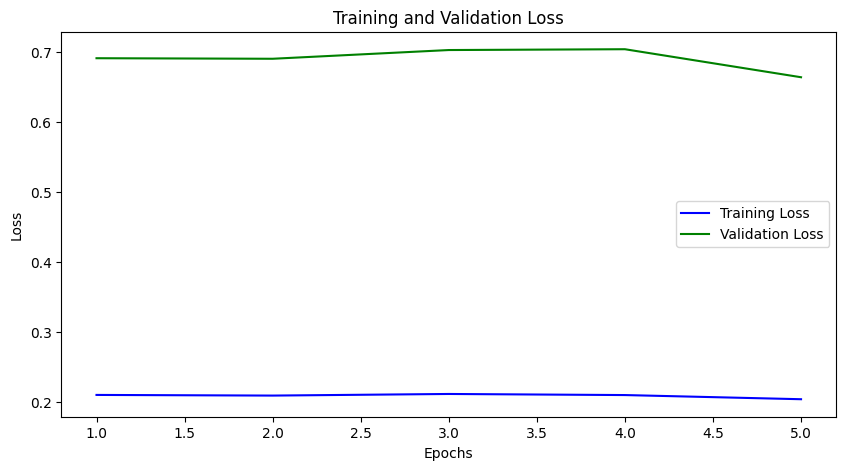

In [59]:
plot_loss(history)

C:\Users\moham\Desktop\Internship\ImmuneSystemDM\src\visualization\plotting.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['accuracy'], 'b', label='Accuracy', color='blue')
C:\Users\moham\Desktop\Internship\ImmuneSystemDM\src\visualization\plotting.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy', color='cyan',
C:\Users\moham\Desktop\Internship\ImmuneSystemDM\src\visualization\plotting.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['roc_auc'], 'b', l

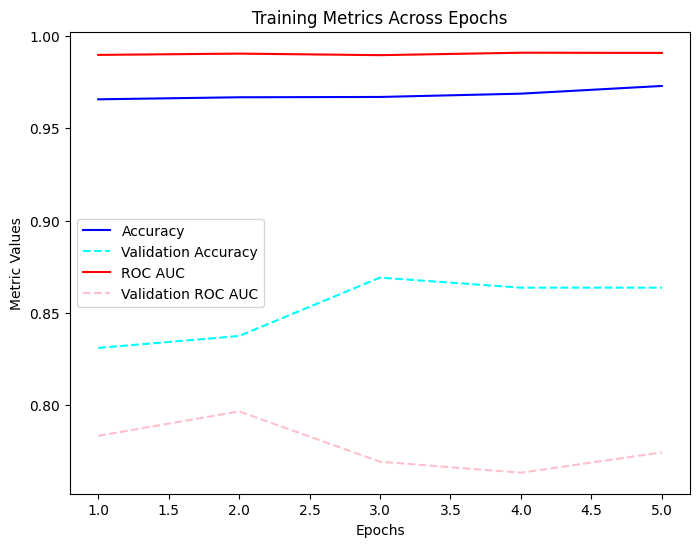

In [60]:
plot_metrics(history)

In [61]:
test_data_ab = generate_test_data(test_folder, trab_chains, InteractionMapMode.CONCATENATE, shape_ab)

auc_scores = model.evaluate(test_data_ab)


shape (38, 10, 4)
5/5 [==============================] - 0s 21ms/step
shape (38, 10, 4)
9/9 [==============================] - 0s 19ms/step
shape (38, 10, 4)
26/26 [==============================] - 1s 19ms/step
shape (38, 10, 4)
7/7 [==============================] - 0s 20ms/step
shape (38, 10, 4)
2/2 [==============================] - 0s 22ms/step
shape (38, 10, 4)
3/3 [==============================] - 0s 16ms/step
shape (38, 10, 4)
5/5 [==============================] - 0s 17ms/step
shape (38, 10, 4)
9/9 [==============================] - 0s 20ms/step
shape (38, 10, 4)
5/5 [==============================] - 0s 20ms/step
shape (38, 10, 4)
13/13 [==============================] - 0s 22ms/step
shape (38, 10, 4)
3/3 [==============================] - 0s 18ms/step
shape (38, 10, 4)
3/3 [==============================] - 0s 13ms/step
shape (38, 10, 4)
2/2 [==============================] - 0s 17ms/step
shape (38, 10, 4)
5/5 [==============================] - 0s 17ms/step
shape (38, 10, 4

In [62]:
print(sum(auc_scores.values()) / len(auc_scores))

0.7845325289417475


# Train on TRB, test on TRA

In [14]:
test_data_b2 = generate_test_data(test_folder, trb_chain, InteractionMapMode.SINGLE, shape_a)
auc_scores = evaluate(
    model_path_tra,
    test_data_b2
)

shape (23, 10, 4)
5/5 [==============================] - 0s 23ms/step
shape (23, 10, 4)
9/9 [==============================] - 0s 13ms/step
shape (23, 10, 4)
26/26 [==============================] - 0s 15ms/step
shape (23, 10, 4)
7/7 [==============================] - 0s 16ms/step
shape (23, 10, 4)
2/2 [==============================] - 0s 15ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 11ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 14ms/step
shape (23, 10, 4)
9/9 [==============================] - 0s 13ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 17ms/step
shape (23, 10, 4)
13/13 [==============================] - 0s 13ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 12ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 14ms/step
shape (23, 10, 4)
2/2 [==============================] - 0s 17ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 12ms/step
shape (23, 10, 4

In [15]:
print(sum(auc_scores.values()) / len(auc_scores))

0.5353827930171998


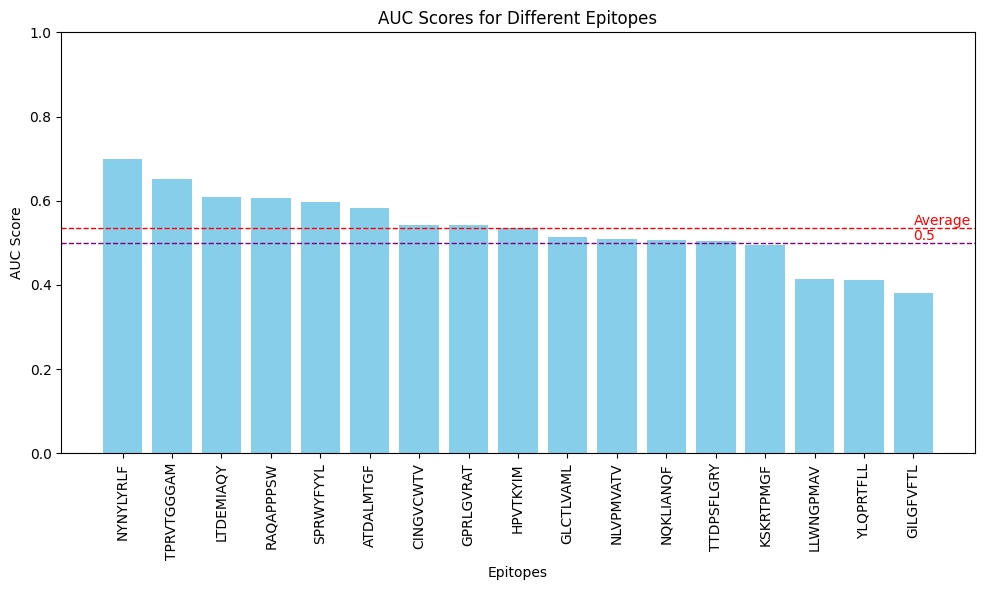

In [16]:
plot_auc(auc_scores)

# Combine TRA and TRB imaps into 8 channel imap

In [9]:
model_path_trab_combine = 'temp_models/binary_classification_trab_combine_20epochs'
trab_chains_combine = ['TRA_CDR3', 'TRB_CDR3']
df_ab_combine, shape_ab_combine = generate_imap_dataset(train_folder,trab_chains_combine, InteractionMapMode.COMBINE)
shape_ab_combine

(23, 10, 8)

In [20]:
history_trab_combine = train(
    imap_df=df_ab_combine,
    imap_shape=shape_ab_combine,
    model_path=model_path_trab_combine,
    epochs=20,
)

Epoch 1/20
368/368 [==============================] - 28s 70ms/step - loss: 2.6359 - accuracy: 0.8327 - roc_auc: 0.5880 - precision: 0.5361 - recall: 0.0449 - val_loss: 0.6958 - val_accuracy: 0.8419 - val_roc_auc: 0.5973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
368/368 [==============================] - 27s 74ms/step - loss: 0.5806 - accuracy: 0.8445 - roc_auc: 0.6367 - precision: 0.6883 - recall: 0.1394 - val_loss: 0.5418 - val_accuracy: 0.8599 - val_roc_auc: 0.6614 - val_precision: 0.8732 - val_recall: 0.1333
Epoch 3/20
368/368 [==============================] - 25s 69ms/step - loss: 0.5165 - accuracy: 0.8532 - roc_auc: 0.6728 - precision: 0.7860 - recall: 0.1763 - val_loss: 0.6120 - val_accuracy: 0.8426 - val_roc_auc: 0.6356 - val_precision: 1.0000 - val_recall: 0.0043
Epoch 4/20
368/368 [==============================] - 26s 70ms/step - loss: 0.5039 - accuracy: 0.8578 - roc_auc: 0.6938 - precision: 0.8008 - recall: 0.2071 - val_loss: 0.4981 - val_accuracy: 0.

INFO:tensorflow:Assets written to: temp_models/binary_classification_trab_combine_20epochs\assets


In [29]:
test_data_ab_combine = generate_test_data(test_folder, trab_chains, InteractionMapMode.COMBINE, shape_ab_combine)

auc_scores = evaluate(
    model_path_trab_combine,
    test_data_ab_combine
)

IndexError: list index out of range

In [ ]:
print(sum(auc_scores.values()) / len(auc_scores))

In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())